In [1]:
import numpy as np
import torch
from data_utils import sim_to_x_y as sxy, sim_to_seqx_y as sseqxy, load_array
import matplotlib.pyplot as plt

In [2]:
data = load_array('Circle_Transient_5_7_2020_0_57.npz')

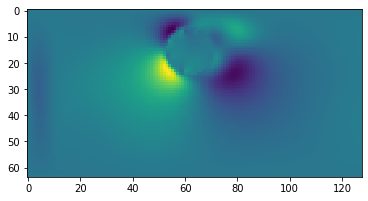

In [39]:
plt.imshow(data[2,1,:,:])

## 1 to 1 Sequence

In [4]:
# simple sequence x of length 1, y of length 1
x_1,y_1 = sxy(data)

print('x1, y1 shapes: ',x_1.shape,y_1.shape)
# sanity 

x1, y1 shapes:  (220, 3, 64, 128) (220, 3, 64, 128)


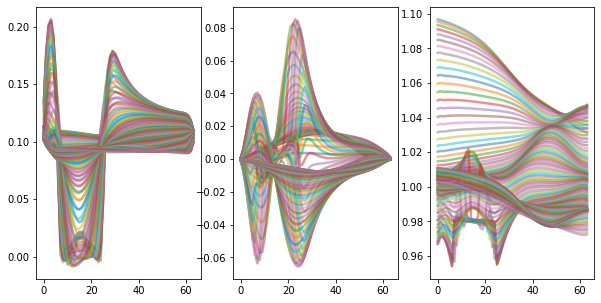

In [5]:
# visualization of the first case
plt.figure(figsize = (10,5))
x_1_vx = x_1[0,0,:,:]
x_1_vy = x_1[0,1,:,:]
x_1_rho = x_1[0,2,:,:]
plt.subplot(1,3,1)
plt.plot(x_1_vx,linewidth=2.5,alpha=.5)
plt.subplot(1,3,2)
plt.plot(x_1_vy,linewidth=2.5,alpha=.5)
plt.subplot(1,3,3)
plt.plot(x_1_rho,linewidth=2.5,alpha=.5)
plt.show()

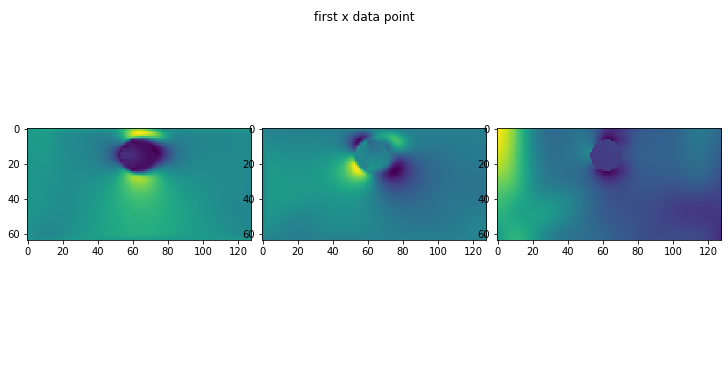

In [6]:
fig = plt.figure(figsize = (10,5),constrained_layout = True)
fig.suptitle('first x data point')
plt.subplot(1,3,1)
plt.imshow(x_1_vx)
plt.subplot(1,3,2)
plt.imshow(x_1_vy)
plt.subplot(1,3,3)
plt.imshow(x_1_rho)
plt.show()

In [8]:
# compare x_2 and y_1 to confirm that they are the same

x_2_vx = x_1[1,0,:,:]
x_2_vy = x_1[1,1,:,:]
x_2_rho = x_1[1,2,:,:]

y_1_vx = x_1[0,0,:,:]
y_1_vy = x_1[0,1,:,:]
y_1_rho = x_1[0,2,:,:]

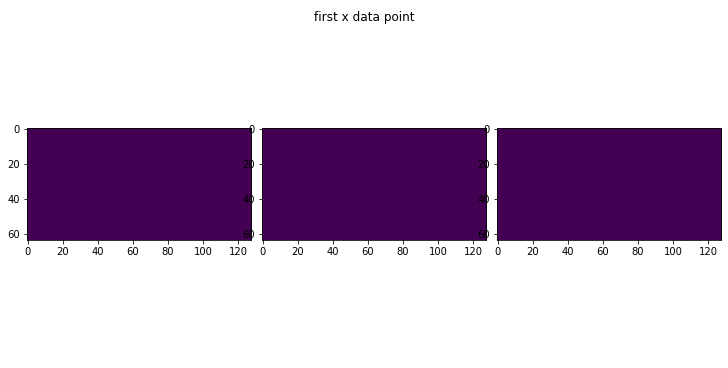

In [9]:
fig = plt.figure(figsize = (10,5),constrained_layout = True)
fig.suptitle('first x data point')
plt.subplot(1,3,1)
plt.imshow(x_2_vx-y_1_vx)
plt.subplot(1,3,2)
plt.imshow(x_2_vy - y_1_vy)
plt.subplot(1,3,3)
plt.imshow(x_2_rho - y_1_rho)
plt.show()

In [43]:
### Indicates that the 1 to 1 sequence is working properly

## sequence of x to 1 y data point

In [44]:
x_seq,y_1 = sseqxy(data)

In [45]:
print(x_seq.shape,y_1.shape)

(216, 5, 3, 64, 128) (216, 3, 64, 128)


In [46]:
x_seq_1 = x_seq[0]

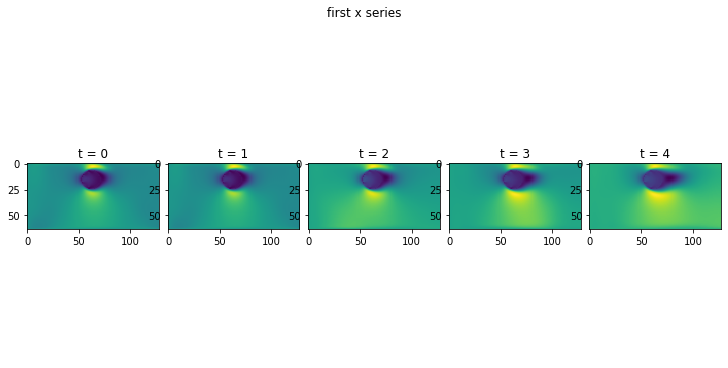

In [47]:
fig = plt.figure(figsize = (10,5),constrained_layout = True)

plt.subplot(1,5,1)
plt.imshow(x_seq_1[0,0,:,:])
plt.title('t = 0')
plt.subplot(1,5,2)
plt.imshow(x_seq_1[1,0,:,:])
plt.title('t = 1')
plt.subplot(1,5,3)
plt.imshow(x_seq_1[2,0,:,:])
plt.title('t = 2')
plt.subplot(1,5,4)
plt.imshow(x_seq_1[3,0,:,:])
plt.title('t = 3')
plt.subplot(1,5,5)
plt.imshow(x_seq_1[4,0,:,:])
plt.title('t = 4')
fig.suptitle('first x series')
plt.show()

(3, 64, 128)


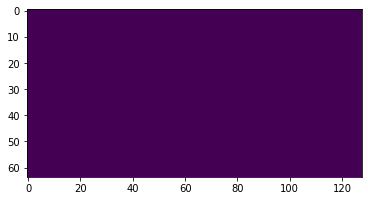

In [32]:
#### Confirm that the first y element is one step ahead of the last element in a given x series

x_seq_2 = x_seq[1]
y_1 = y_1[0]
print(y_1.shape)
# use 1 parameter to check
x_check = x_seq_2[-1,0,:,:]
y_check = y_1[0,:,:]

plt.imshow(x_check - y_check)
plt.show()

## Check that a sequence of X w/ or w/o Empty values populated properly

### change allow_empty to True/False

In [33]:
x_seq,y_1 = sseqxy(data,allow_empty = True)

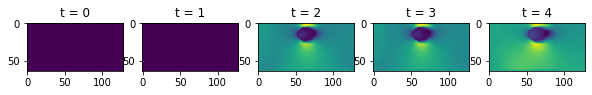

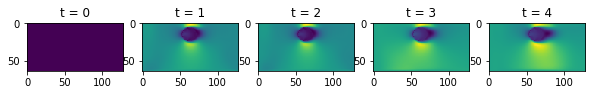

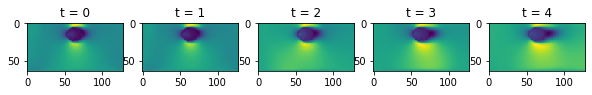

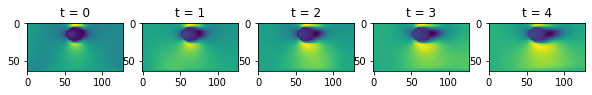

In [34]:
# visualizing
for i in range(2,6):
    x_seq_i = x_seq[i]

    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,5,1)
    plt.imshow(x_seq_i[0,0,:,:])
    plt.title('t = 0')
    plt.subplot(1,5,2)
    plt.imshow(x_seq_i[1,0,:,:])
    plt.title('t = 1')
    plt.subplot(1,5,3)
    plt.imshow(x_seq_i[2,0,:,:])
    plt.title('t = 2')
    plt.subplot(1,5,4)
    plt.imshow(x_seq_i[3,0,:,:])
    plt.title('t = 3')
    plt.subplot(1,5,5)
    plt.imshow(x_seq_i[4,0,:,:])
    plt.title('t = 4')
    plt.show()

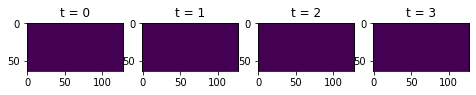

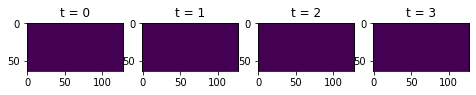

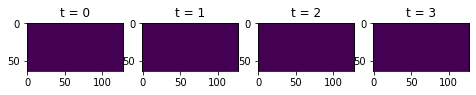

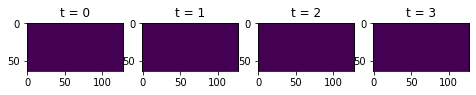

In [35]:
# confirm via differencing
for i in range(2,6):
    x_seq_i = x_seq[i] 
    x_seq_i_1 = x_seq[i+1]
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,5,1)
    plt.imshow(x_seq_i[1,0,:,:]-x_seq_i_1[0,0,:,:])
    plt.title('t = 0')
    plt.subplot(1,5,2)
    plt.imshow(x_seq_i[2,0,:,:]-x_seq_i_1[1,0,:,:])
    plt.title('t = 1')
    plt.subplot(1,5,3)
    plt.imshow(x_seq_i[3,0,:,:]-x_seq_i_1[2,0,:,:])
    plt.title('t = 2')
    plt.subplot(1,5,4)
    plt.imshow(x_seq_i[4,0,:,:]-x_seq_i_1[3,0,:,:])
    plt.title('t = 3')
    plt.show()

### Check that the y elements are loading correctly

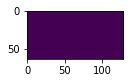

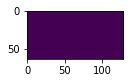

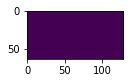

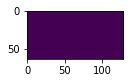

In [36]:

# check by comparing last element of current x sequence to the y element of the previous sample
for i in range(2,6):
    x_seq_i = x_seq[i] 
    y       = y_1[i-1]
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,5,1)
    plt.imshow(x_seq_i[-1,0,:,:]-y[0,:,:])
    plt.show()


## Sequence X to Sequence Y Check

In [48]:
from data_utils import sim_to_seqx_seqy

x,y = sim_to_seqx_seqy(data,x_len = 5,y_len = 2,allow_empty=True)

In [49]:
x_last = x[-1,-1,0,:,:]
y_last = y[-1,-1,0,:,:]

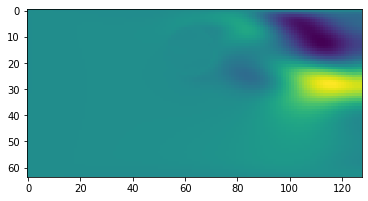

In [50]:
plt.imshow(x_last-y_last)

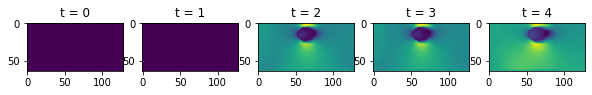

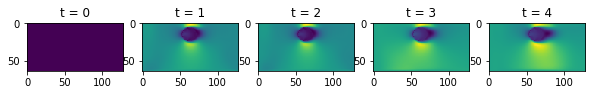

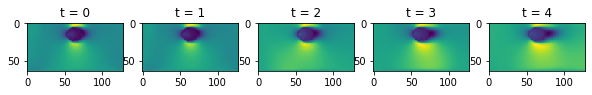

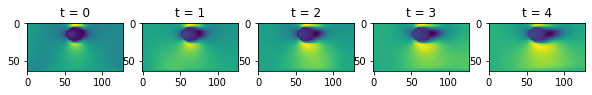

In [40]:
# visual check

for i in range(2,6):
    x_seq_i = x[i] # lets look 2 steps ahead

    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,5,1)
    plt.imshow(x_seq_i[0,0,:,:])
    plt.title('t = 0')
    plt.subplot(1,5,2)
    plt.imshow(x_seq_i[1,0,:,:])
    plt.title('t = 1')
    plt.subplot(1,5,3)
    plt.imshow(x_seq_i[2,0,:,:])
    plt.title('t = 2')
    plt.subplot(1,5,4)
    plt.imshow(x_seq_i[3,0,:,:])
    plt.title('t = 3')
    plt.subplot(1,5,5)
    plt.imshow(x_seq_i[4,0,:,:])
    plt.title('t = 4')
    plt.show()

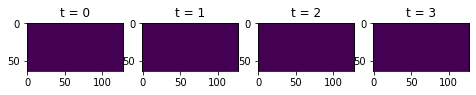

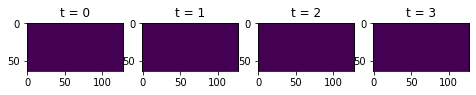

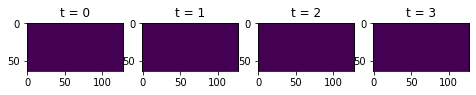

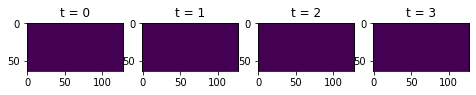

In [41]:
for i in range(2,6):
    x_seq_i = x[i] 
    x_seq_i_1 = x[i+1]
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,5,1)
    plt.imshow(x_seq_i[1,0,:,:]-x_seq_i_1[0,0,:,:])
    plt.title('t = 0')
    plt.subplot(1,5,2)
    plt.imshow(x_seq_i[2,0,:,:]-x_seq_i_1[1,0,:,:])
    plt.title('t = 1')
    plt.subplot(1,5,3)
    plt.imshow(x_seq_i[3,0,:,:]-x_seq_i_1[2,0,:,:])
    plt.title('t = 2')
    plt.subplot(1,5,4)
    plt.imshow(x_seq_i[4,0,:,:]-x_seq_i_1[3,0,:,:])
    plt.title('t = 3')
    plt.show()

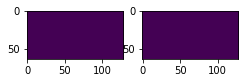

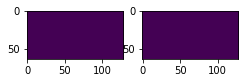

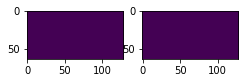

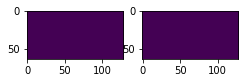

In [42]:
# check by comparing last 2 elements of current x sequence 
# should be equal to the elements of the y sequence from 2 steps prior
# should gets zeros when we subtract the two
for i in range(2,6):
    x_seq_i = x[i]
    y_i       = y[i-2]
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,5,1)
    plt.imshow(x_seq_i[-1,0,:,:]-y_i[-1,0,:,:])
    plt.subplot(1,5,2)
    plt.imshow(x_seq_i[-2,0,:,:]-y_i[-2,0,:,:])
    plt.show()